# Laboratory practice № 3 (forced movement)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [2]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np

In [3]:
dt = 0.001

In [4]:
color = ["b", "g", "r"]

## Task 1

Mode pairs: 

5. neutral & time proportional
6. conservative modes
7. pair of stable oscillating modes


In [5]:
a_1 = sympy.Symbol("a_1")
a_0 = sympy.Symbol("a_0")
lambdas = [
    [0, 0],
    [sympy.I, -sympy.I],
    [-1 + sympy.I, -1 - sympy.I]
]

In [6]:
sols = []
for l in lambdas:
    sol = sympy.solve([l[0] + l[1] + a_1,l[0]*l[1] -a_0],a_1,a_0)
    sols.append([float(sol[a_1]), float(sol[a_0])])
    print("Solutions:",*sols[-1])

Solutions: 0.0 0.0
Solutions: 0.0 1.0
Solutions: 2.0 2.0


In [7]:
y = sympy.Function("y")
t = sympy.Symbol("t")

In [8]:
sympy.dsolve(y(t).diff(t,2)+sols[0][0]*y(t).diff(t) + sols[0][1]*y(t), 0)

Eq(y(t), C1 + C2*t)

In [9]:
sympy.dsolve(y(t).diff(t,2)+sols[1][0]*y(t).diff(t) + sols[1][1]*y(t), 0)

Eq(y(t), C1*sin(t) + C2*cos(t))

In [10]:
sympy.dsolve(y(t).diff(t,2)+sols[2][0]*y(t).diff(t) + sols[2][1]*y(t), 0)

Eq(y(t), (C1*sin(1.0*t) + C2*cos(1.0*t))*exp(-1.0*t))

In [11]:
transferFunction_1_1 = ctrl.tf([1.], [1., *sols[0]])
transferFunction_1_2 = ctrl.tf([1.], [1., *sols[1]])
transferFunction_1_3 = ctrl.tf([1.], [1., *sols[2]])

In [12]:
state_space_1_1, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_1), form="reachable")
state_space_1_2, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_2), form="reachable")
state_space_1_3, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_3), form="reachable")

In [13]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))
u_1_1 = np.ones_like(time_1)*2.5
u_1_2 = 0.5 * time_1
u_1_3 = np.cos(time_1)

In [14]:
init_state_1_1 = [0,-1]
init_state_1_2 = [0,0]
init_state_1_3 = [0,1]

In [15]:
us = ["2.5", "0.5t", "\cos(t)"]
is_ = ["-1", "0", "1"]

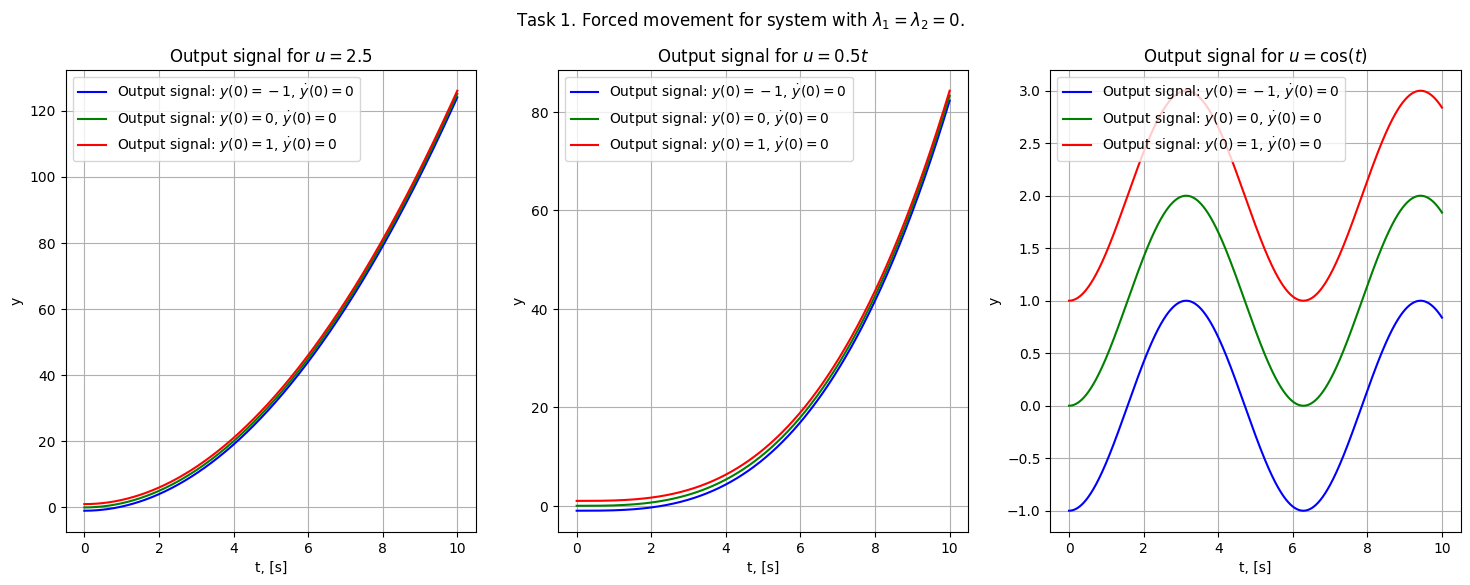

In [16]:

y_1_1 = [[], [], []]
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 = \lambda_2 = 0$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_1[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()

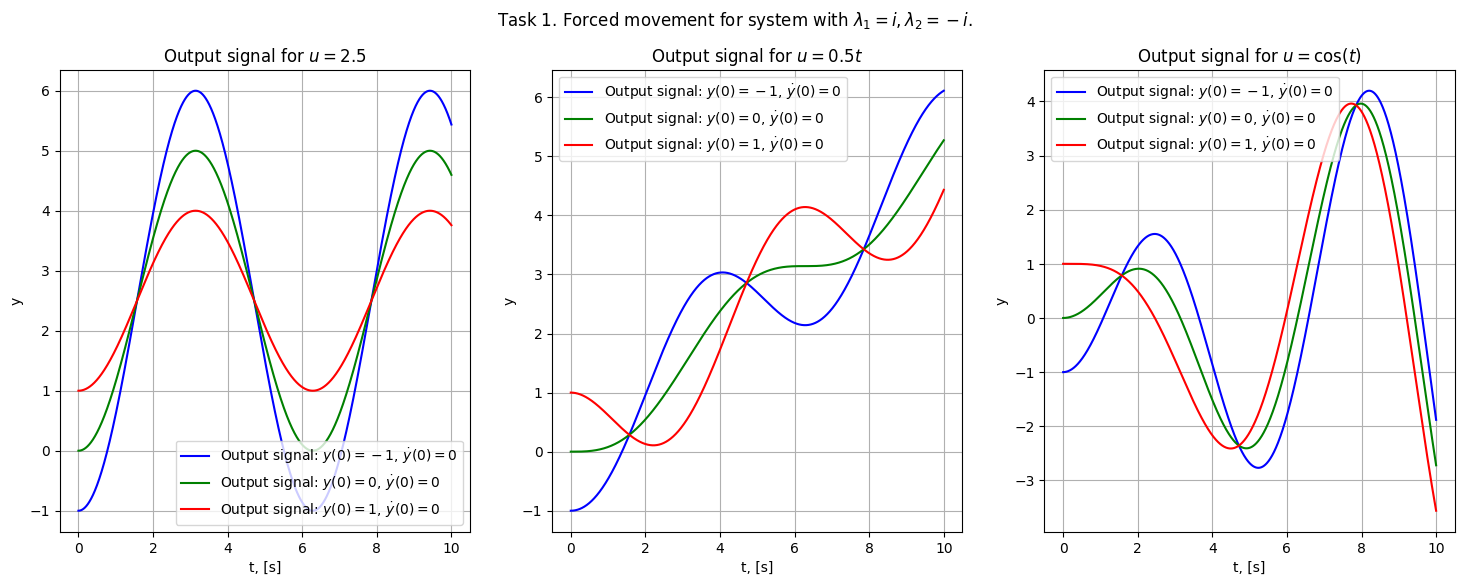

In [17]:
y_1_2 = [[], [], []]
y_1_2[0].append(ctrl.forced_response(state_space_1_2, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_2[0].append(ctrl.forced_response(state_space_1_2, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_2[0].append(ctrl.forced_response(state_space_1_2, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_2[1].append(ctrl.forced_response(state_space_1_2, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_2[1].append(ctrl.forced_response(state_space_1_2, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_2[1].append(ctrl.forced_response(state_space_1_2, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_2[2].append(ctrl.forced_response(state_space_1_2, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_2[2].append(ctrl.forced_response(state_space_1_2, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_2[2].append(ctrl.forced_response(state_space_1_2, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 =i, \lambda_2 = -i$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_2[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()

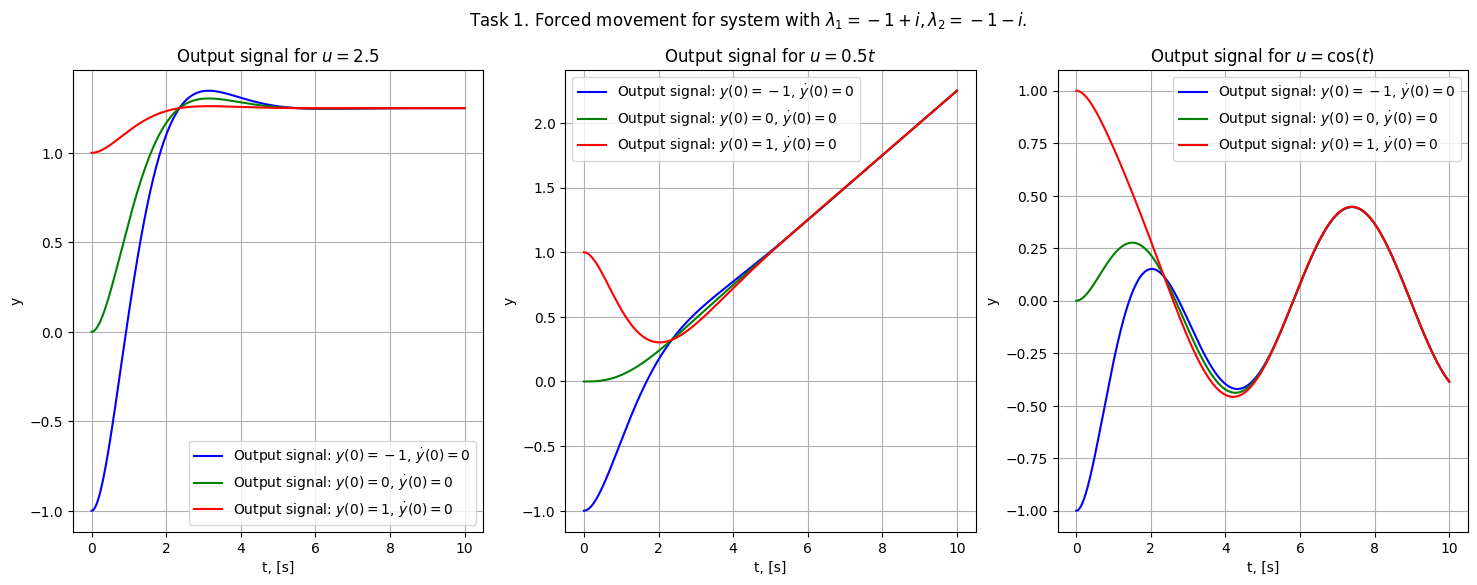

In [18]:
y_1_3 = [[], [], []]
y_1_3[0].append(ctrl.forced_response(state_space_1_3, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_3[0].append(ctrl.forced_response(state_space_1_3, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_3[0].append(ctrl.forced_response(state_space_1_3, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_3[1].append(ctrl.forced_response(state_space_1_3, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_3[1].append(ctrl.forced_response(state_space_1_3, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_3[1].append(ctrl.forced_response(state_space_1_3, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_3[2].append(ctrl.forced_response(state_space_1_3, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_3[2].append(ctrl.forced_response(state_space_1_3, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_3[2].append(ctrl.forced_response(state_space_1_3, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 =-1+i, \lambda_2 = -1-i$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_3[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()

## Quality of dynamic processes

In [19]:
s = sympy.symbols("s")

In [20]:
roots_1 = [
    [-1]*3,
    [-3]*3,
    [-6]*3,
]

In [21]:
modeling_time_2 = 10 # sec
time_2_1 = np.linspace(0,modeling_time_2,int(modeling_time_2/dt))
u_2_1 = np.ones_like(time_2_1)

AttributeError: 'list' object has no attribute 'states'

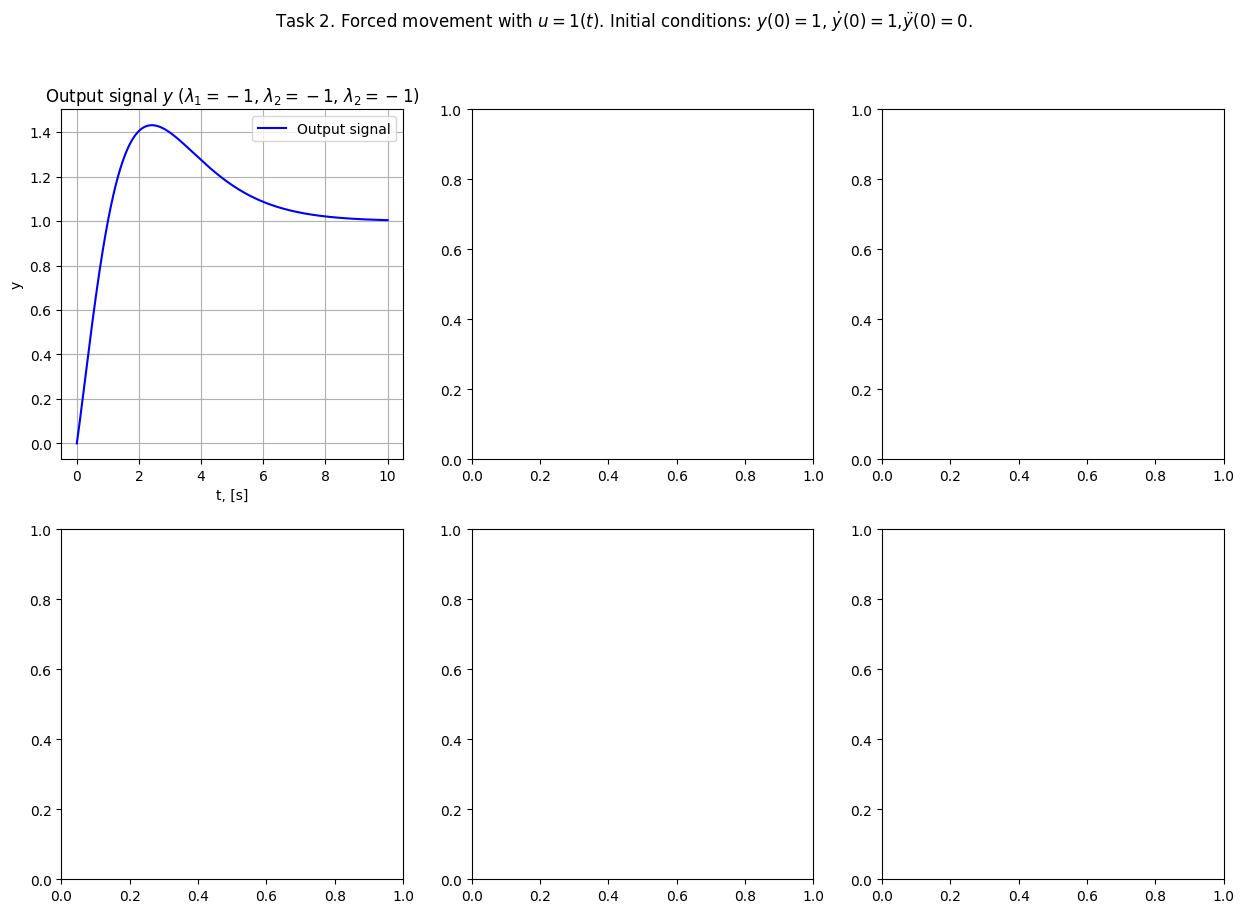

In [22]:


fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 2. Forced movement with $u=1(t)$. Initial conditions: $y(0)=1$, $\dot y (0)=1$,$\ddot y (0)=0.$")
for i in range(len(roots_1)):
    den = list(map(float,sympy.Poly(((s-roots_1[i][0])*(s-roots_1[i][1])*(s-roots_1[i][2])),s).coeffs()))
    tf = ctrl.tf([1], den)
    ss, _ = ctrl.canonical_form(ctrl.tf2ss(tf), form="reachable")
    y = ctrl.forced_response(ss, U=u_2_1, X0=[1,1,0], T=time_2_1)
    
    ax[0,i].plot(time_2_1, y.outputs, color[i],label=f"Output signal")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"Output signal $y$ ($\lambda_1={roots_1[i][0]}$, $\lambda_2={roots_1[i][1]}$, $\lambda_2={roots_1[i][2]}$)")
    ax[0,i].legend()

    # ax[1,i].plot(time_1, y_1_1[i].states[0,:], color[i],label=f"Output signal")
    # ax[1,i].set_ylabel("Imaginary part")
    # ax[1,i].set_xlabel("Real part")
    # ax[1,i].grid(True)
    # ax[1,i].set_title(f"Output signal $\dot y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    # ax[1,i].legend()


## Task 3 (Laplace transform)

In [80]:
den_3 = list(map(float,sympy.Poly((s+2)**4,s).coeffs()))
tf_3_1 = ctrl.tf([6], den_3)
tf_3_1

TransferFunction(array([6]), array([ 1.,  8., 24., 32., 16.]))

In [81]:
modeling_time_3 = 10 # sec
time_3 = np.linspace(0,modeling_time_3,int(modeling_time_3/dt))
u_3 = np.cos(2*time_3) - 2 * np.cos(3*time_3)

In [82]:
t = sympy.symbols("t")

In [83]:
W = 6/ (s+2)**4
u = sympy.cos(2*t) - 2*sympy.cos(3*t)
U = sympy.laplace_transform(u, t, s)[0]

In [84]:
y_anal = sympy.inverse_laplace_transform(W*U,s,t)
y_anal

-2241*t*exp(-2*t)*Heaviside(t)/35152 + 6*(240*sin(3*t)/28561 + 238*cos(3*t)/28561)*Heaviside(t) + (166972*t**3 - 162240*t**2 - 173082*t + 69120*exp(2*t)*sin(3*t) - 85683*exp(2*t)*cos(2*t) + 68544*exp(2*t)*cos(3*t) + 17139)*exp(-2*t)*Heaviside(t)/228488 - 3*cos(2*t)*Heaviside(t)/32 + 39987*exp(-2*t)*Heaviside(t)/913952

In [85]:
def convolve(f, g, t, lower_limit=-sympy.oo, upper_limit=sympy.oo):
    tau = sympy.Symbol('__very_unlikely_name__', real=True)
    return sympy.integrate(f.subs(t, tau) * g.subs(t, t - tau), 
                     (tau, lower_limit, upper_limit))

In [86]:
y_conv = convolve(sympy.inverse_laplace_transform(W,s,t),u,t)

In [87]:
y_conv

1440*sin(3*t)/28561 - 3*cos(2*t)/32 + 1428*cos(3*t)/28561

In [88]:
y_conv_l = sympy.lambdify(t,y_conv,"numpy")

In [89]:
y_f = sympy.lambdify(t,y,"numpy")

In [90]:
TF = (W*U).simplify()
num_3 = list(map(float,sympy.Poly(sympy.fraction(TF)[0],s).coeffs()))
denum_3 = list(map(float,sympy.Poly(sympy.fraction(TF)[1],s).coeffs()))

In [91]:
tf_3_2=ctrl.tf(num_3, denum_3)
tf_3_2

TransferFunction(array([-6.,  6.]), array([1.000e+00, 8.000e+00, 3.700e+01, 1.360e+02, 3.640e+02, 7.040e+02,
       1.072e+03, 1.152e+03, 5.760e+02]))

In [114]:
dt = 10**-5
time_3 = np.linspace(0,modeling_time_3,int(modeling_time_3/dt))
u_3_1 = np.zeros_like(time_3)
u_3_1[0:10]=10**4
u_3 = np.cos(2*time_3) - 2 * np.cos(3*time_3)

In [117]:
y_3 = ctrl.forced_response(tf_3_1, U=u_3, X0=0, T=time_3)
y_3_ = y_f(time_3)

# y_3_ = y_f(time_3)
y_3__ = y_conv_l(time_3)

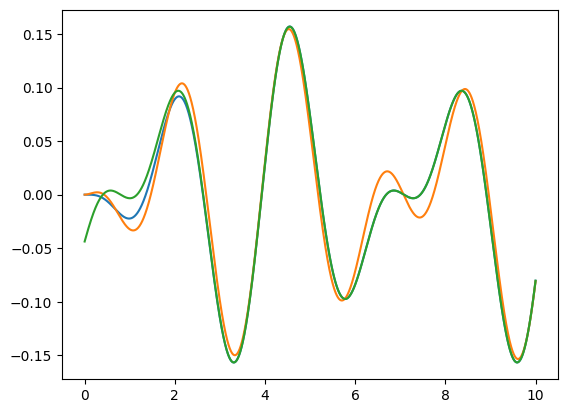

In [120]:
plt.plot(time_3, y_3.outputs)
plt.plot(time_3, y_3_/6)
plt.plot(time_3, y_3__)